# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например,Xbox или PlayStation). 
Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и
спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию. 
- «E» («Everyone») — «Для всех» (до 1998 года - "K-A") 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» («Rating Pending») — «Рейтинг ожидается»


## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

## Подготовьте данные
    ● Замените названия столбцов (приведите к нижнему регистру);
    ● Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    ● Обработайте пропуски при необходимости:
        ○ Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
        ○ Опишите причины, которые могли привести к пропускам;
        ○ Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 
        Отдельно разберите это значение и опишите, как его обработать;
    ● Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [8]:
# Изменим тип данных в столбце 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [9]:
# Проверим наличие дубликатов 
data.duplicated().sum()

0

In [10]:
# Проверим пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

In [11]:
# Посчитаем долю пропусков в каждом столбце
columns= list(data)
for column in columns:
    print('Доля пропусков в', column,':', len(data[data[column].isna()])/len(data[column]))

Доля пропусков в name : 0.00011965300628178283
Доля пропусков в platform : 0.0
Доля пропусков в year_of_release : 0.01609332934489979
Доля пропусков в genre : 0.00011965300628178283
Доля пропусков в na_sales : 0.0
Доля пропусков в eu_sales : 0.0
Доля пропусков в jp_sales : 0.0
Доля пропусков в other_sales : 0.0
Доля пропусков в critic_score : 0.5131917439425665
Доля пропусков в user_score : 0.4008973975471134
Доля пропусков в rating : 0.4047861202512713
Доля пропусков в total_sales : 0.0


<font color='Blue'><b>Значимое количество пропусков у нас имеется в столбцах оценок. Но в данном случае это субъективные категории и мы не можем их заменить на среднее/медиану. Удалить строки с этими пропусками мы тоже не можем, т.к. это существенно повлияет на анализ других данных (выручка, жанр, тип платформы). Поэтому оставим без изменений и построим анализ на основе существующих данных. 
   
<font color='Blue'><b>    Также имеем незначительное количество пропусков в годе выпуска игр. Если год выпуска отсутствует на одной платформе, но имеется на другой, можно вставить недостающие данные. Но кажется на это требуется больше времени либо больше навыков в написании кода. Я решил оставить без изменений, т.к. 1,6% не является значимым чтобы сильно повлиять на исследование</b></font><br>

<font color='Blue'><b> 
    Учитывая замечания, внесем исправления в столбец рейтингов: 
- заменим старый рейтинг "К-А" на действующий "Е"
- изменим пропуски на "no_rating"

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].fillna('no_rating')
data['rating'].value_counts()

no_rating    6766
E            3993
T            2961
M            1563
E10+         1420
EC              8
RP              3
AO              1
Name: rating, dtype: int64

In [14]:
# Займемся значением "tbd" (to be determined) в столбце 'user_score'
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1         2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [15]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


<font color='Blue'><b> Оценка "tbd" говорит о том, что еще нет достаточного количества оценок (игра только вышла), либо она старая, и на тот момент оценки/отзывы еще не собирались. В любом случае, значение "tbd" по сути является пропуском, и мы можем заменить на NaN и исправить тип данных

In [16]:
data['user_score']=data['user_score'].replace('tbd', np.NaN)
data['user_score']=data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


## Проведите исследовательский анализ данных

    ● Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    ● Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами 
    и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    ● Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно 
    в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    ● Не учитывайте в работе данные за предыдущие годы.
    ● Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    ● Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    ● Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
    Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    ● Соотнесите выводы с продажами игр на других платформах.
    ● Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
    Выделяются ли жанры с высокими и низкими продажами?

In [17]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


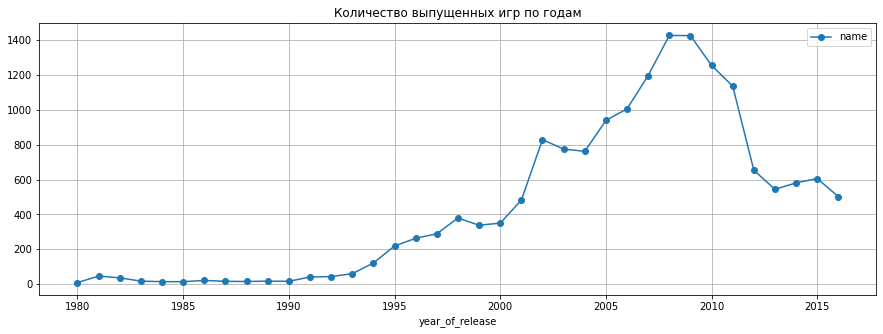

In [18]:
games_per_year.plot(
    y='name', style='-o', grid=True, figsize=(15,5), title='Количество выпущенных игр по годам')
plt.show(block=False)

<font color='Blue'><b> На графике мы видим, что вплоть до середины 90-х годов игровая индустрия практически не развивалась. Начиная с 1995 пошел рост, вероятно связанный с тем, что начали получать распространение первые игровые приставки. Резкий рост произошел в 2000 году, связанный с появлением игровых консолей нового поколения (напр. Sony Playstation). Пиковым стал период 2008-2009 гг., после чего произошел спад, возможно связанный с появлением айфонов и развитием мобильных игр для смартфонов и мобильных консолей.

Для анализа общего развития отрасли в данный момент совсем необязательно брать весь период за 36 лет начиная с самого появления компьютерных игр. Считаю достаточным взять период за последние 10 лет. А для прогнозирования перспективы продаж за будущий период (в нашем случае - 2017 год) самым актуальным является выборка данных за 2016 год, так как технологии меняются очень быстрыми темпами, и вкусы людей также могут меняться очень быстро.
Но пока будем следовать заданию проекта и рассмотрим всю историю продаж.

In [19]:
# Продажи по платформам за все время
platform_sales = data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
platform_sales

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [20]:
# Платформы с наибольшими суммарными продажами 
bestselling_platforms = platform_sales.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
bestselling_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


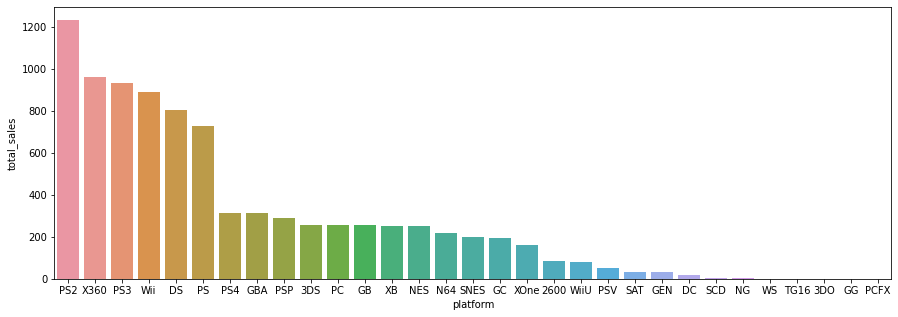

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=bestselling_platforms['platform'], y=bestselling_platforms['total_sales'])
plt.show()

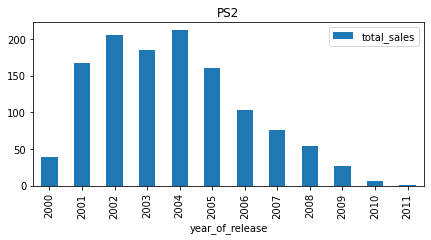

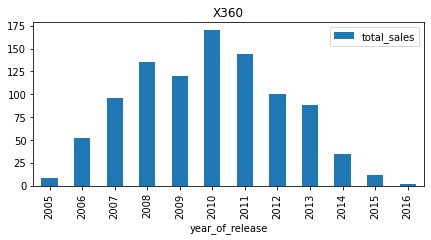

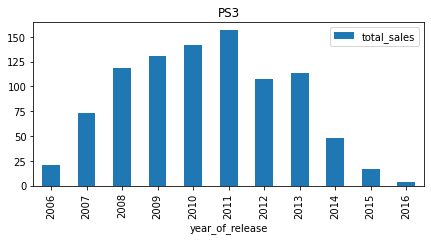

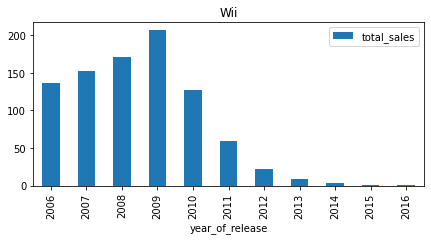

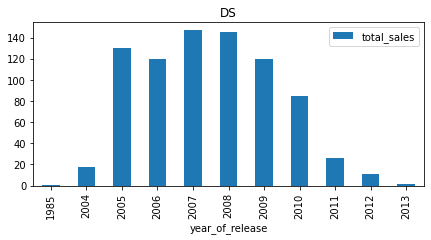

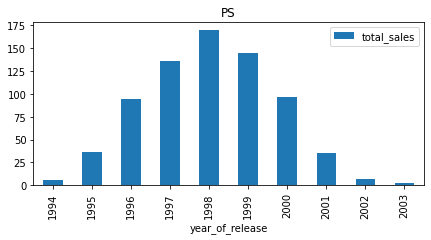

In [22]:
# платформы с наибольшими суммарными продажами - распределение по годам.
list_of_platforms = bestselling_platforms['platform'].head(6)
for platform in list_of_platforms:
    data[data['platform']==platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(7,3))
    plt.title(platform)

<font color='Blue'><b>На графиках видно, что срок жизни игровых платформ составляет примерно 10 лет:

- PS2 - с 2000 до 2011 года;
- Х360 - с 2005; к 2016 практически не используется;
- PS3 - вышла в 2006 и продолжала существовать на 2016 год, но начала сильно сдавать позиции с выходом в 2013 году PS4;
- Wii - продается с 2006 г., в 2016 уже почти изжила себя.
- DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;
- PS - с 1994 года до 2003 года;
    
Таким образом, в среднем срок "жизни" игровой платформы составляет 10 лет. 

In [23]:
# Данные за соответствующий актуальный период = 2016 год
top_data = data.query('year_of_release==2016')
top_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,no_rating,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [24]:
# Данные за последние 3 года
recent_data = data.query('year_of_release>2013')
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


In [25]:
top_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 94 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             502 non-null    object 
 1   platform         502 non-null    object 
 2   year_of_release  502 non-null    Int64  
 3   genre            502 non-null    object 
 4   na_sales         502 non-null    float64
 5   eu_sales         502 non-null    float64
 6   jp_sales         502 non-null    float64
 7   other_sales      502 non-null    float64
 8   critic_score     232 non-null    float64
 9   user_score       262 non-null    float64
 10  rating           502 non-null    object 
 11  total_sales      502 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 51.5+ KB


In [26]:
# Данные за 2016 год
top_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,46.0,0.329130,1.058533,0.01,0.0300,0.080,0.2100,7.14
PC,54.0,0.097222,0.135916,0.01,0.0200,0.035,0.1200,0.65
PS3,38.0,0.094737,0.120556,0.01,0.0300,0.065,0.1200,0.73
PS4,164.0,0.422256,0.968877,0.01,0.0300,0.085,0.3525,7.60
PSV,85.0,0.050000,0.056273,0.01,0.0200,0.030,0.0600,0.30
Wii,1.0,0.180000,NaN,0.18,0.1800,0.180,0.1800,0.18
WiiU,14.0,0.328571,0.348135,0.01,0.0475,0.215,0.4075,1.03
X360,13.0,0.116923,0.114483,0.02,0.0400,0.100,0.1200,0.38
XOne,87.0,0.300575,0.549133,0.01,0.0200,0.060,0.2750,2.65


In [27]:
# Данные за последние 3 года
recent_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [28]:
# Продажи по платформам за 2016 год
sales_2016 = top_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index()
sales_2016

,platform,total_sales
0,3DS,15.14
1,PC,5.25
2,PS3,3.60
3,PS4,69.25
4,PSV,4.25
5,Wii,0.18
6,WiiU,4.60
7,X360,1.52
8,XOne,26.15


In [29]:
# Продажи по платформам за 2014-2016 гг.
sales_three_years = recent_data.pivot_table(
    index=['platform'], values='total_sales', aggfunc='sum').reset_index()
sales_three_years

,platform,total_sales
0,3DS,86.68
1,PC,27.05
2,PS3,68.18
3,PS4,288.15
4,PSP,0.36
5,PSV,22.40
6,Wii,5.07
7,WiiU,42.98
8,X360,48.22
9,XOne,140.36


In [30]:
platforms_2016 = sales_2016.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
platforms_2016.head()

,platform,total_sales
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25
4,WiiU,4.60


In [31]:
platforms_recent = sales_three_years.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
platforms_recent.head()

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


Text(0.5, 1.0, 'Продажи по платформам за 2016 год')

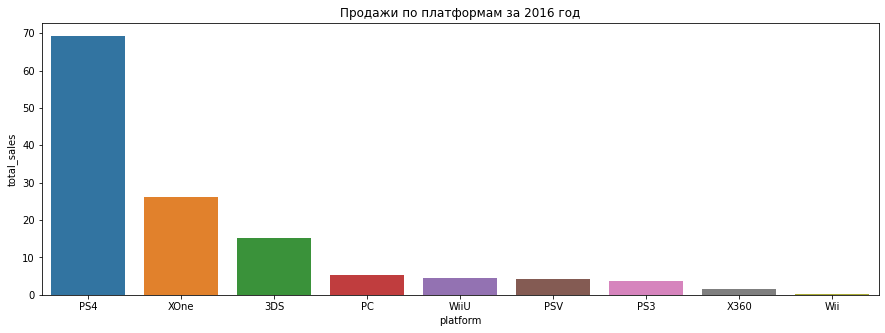

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=platforms_2016['platform'], y=platforms_2016['total_sales'])
plt.title('Продажи по платформам за 2016 год')

Text(0.5, 1.0, 'Продажи по платформам за 2013-2016 гг.')

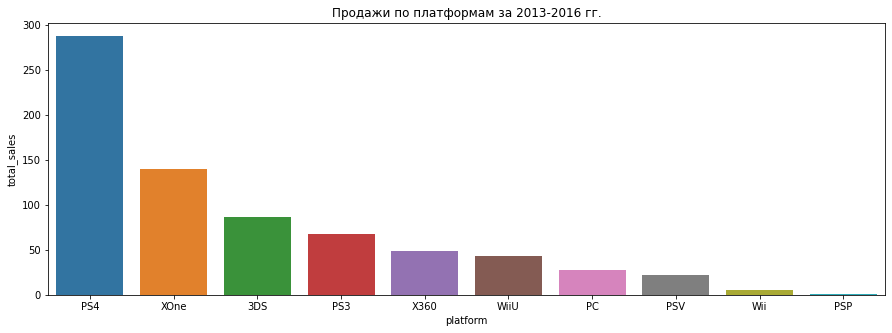

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=platforms_recent['platform'], y=platforms_recent['total_sales'])
plt.title('Продажи по платформам за 2013-2016 гг.')

<font color='Blue'><b> С учетом сделанных выводов, что в среднем платформа "живет" 10 лет, для выявления потенциально прибыльных, рассмотрим платформы за период с 2007 по 2016 гг.

In [34]:
ten_years_data = data.query('year_of_release>2006')
ten_years_platforms = ten_years_data.pivot_table(
    index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
ten_years_platforms.head(10)

total_sales
year_of_release platform             
2007            DC               0.02
                DS             146.94
                GBA              3.40
                GC               0.27
                PC               9.28
                PS2             75.99
                PS3             73.19
                PSP             46.93
                Wii            152.77
                X360            95.41

In [35]:
ten_years_platforms = ten_years_platforms.reset_index()
top_platforms = ten_years_platforms.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()
top_platforms.head()

,platform,total_sales
0,PS3,910.38
1,X360,901.37
2,Wii,754.03
3,DS,535.54
4,PS4,314.14


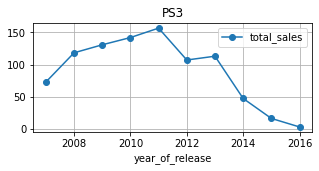

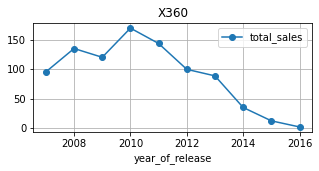

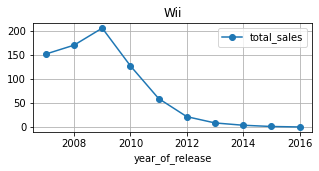

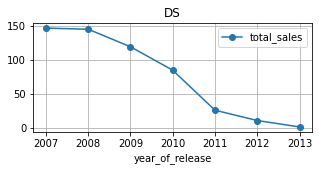

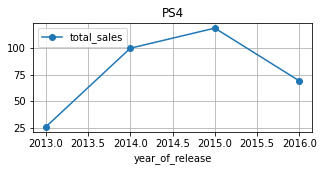

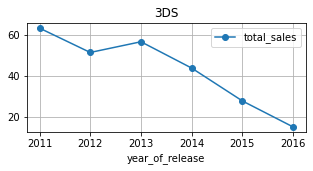

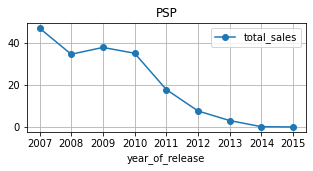

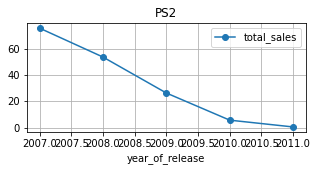

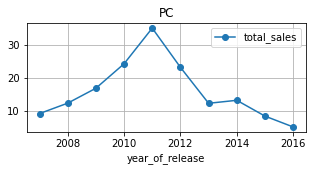

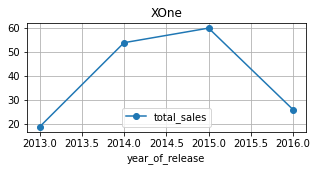

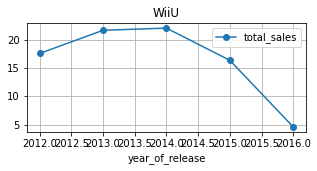

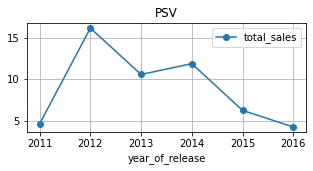

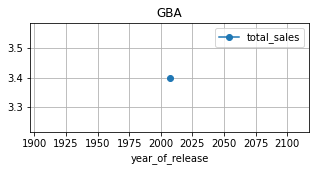

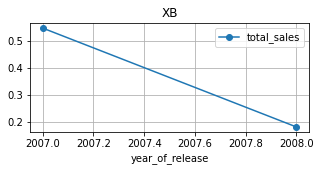

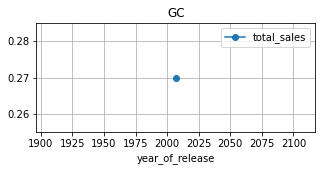

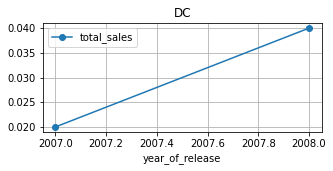

In [36]:
# Построим графики по продажам за последние 10 лет для самых продаваемых платформ
top_list = top_platforms['platform']
for platform in top_list:
    ten_years_platforms[ten_years_platforms['platform']==platform].set_index('year_of_release').plot(
        y='total_sales', style='-o', grid=True, figsize=(5,2), title=platform)


<font color='Blue'><b>Анализ показал, что на конец 2016 года пока еще достаточным потенциалом обладают PS4 и XBox One, выпущенные в 2013 году. Может быть можно рассмотреть адаптацию игр для PC как "нестареющей классики" и самой доступной платформы для пользователей. Все остальные платформы уже на закате и вряд ли имеет смысл разрабатывать для них игры.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

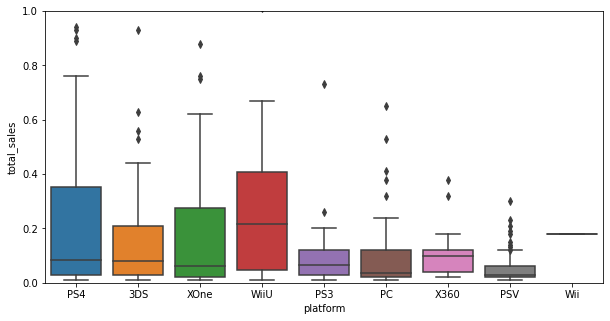

In [37]:
# Построим боксплот для платформ, существующих в 2016 году 
plt.figure(figsize=(10,5))
plt.ylim(0, 1)
sns.boxplot(data=top_data, x='platform', y='total_sales')

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

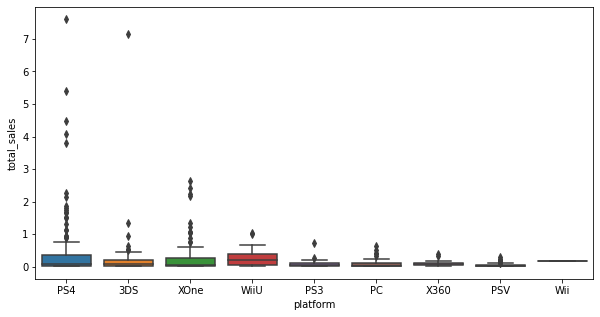

In [38]:
# "Необрезанный" боксплот
plt.figure(figsize=(10,5))
sns.boxplot(data=top_data, x='platform', y='total_sales')

In [40]:
# Как влияют отзывы пользователей и критиков на продажи PS4  

ps4_data = top_data.query('platform=="PS4"')
ps4_sales_critics = ps4_data.pivot_table(
    index='total_sales', values='critic_score', aggfunc='mean').sort_values(
    by='critic_score', ascending=False)
ps4_sales_critics
#ps4_sales_critics.plot(y='critic_score', figsize=(10,5), style='o', grid=True)

,critic_score
total_sales,
5.39,93.000000
2.14,90.000000
1.66,89.000000
0.76,89.000000
4.07,88.000000
1.88,88.000000
0.64,88.000000
7.60,85.000000
0.36,85.000000


In [41]:
ps4_data['total_sales'].corr(ps4_data['critic_score'])

0.37569493421469646

In [42]:
ps4_data['total_sales'].corr(ps4_data['user_score'])

-0.12246112419649201

In [43]:
# Как влияют отзывы пользователей и критиков на продажи других платформ

list_of_platforms_2016 = platforms_2016['platform'].head()

for platform in list_of_platforms_2016:
    print(platform, top_data[top_data['platform']==platform].pivot_table(
        index='total_sales', values='critic_score', aggfunc='mean').sort_values(
        by='critic_score', ascending=False).head(), end='\n\n')
    

PS4              critic_score
total_sales              
5.39                 93.0
2.14                 90.0
1.66                 89.0
0.76                 89.0
4.07                 88.0

XOne              critic_score
total_sales              
1.08                 91.0
1.06                 91.0
1.03                 90.0
0.22                 88.0
0.57                 87.0

3DS              critic_score
total_sales              
0.08                 81.0
0.93                 81.0
0.01                 77.0
0.21                 72.5
0.11                 72.0

PC              critic_score
total_sales              
0.53                 91.0
0.07                 89.0
0.23                 88.0
0.24                 88.0
0.32                 88.0

WiiU              critic_score
total_sales              
1.03                 86.0
0.01                 81.0
0.19                 76.0
1.01                 76.0
0.42                 75.0



In [44]:
# Сводная таблица оценки пользователей и объема продаж
for platform in list_of_platforms_2016:
    print(platform, top_data[top_data['platform']==platform].pivot_table(
        index='total_sales', values='user_score', aggfunc='mean').sort_values(
    by='user_score', ascending=False).head(), end='\n\n')
 

PS4              user_score
total_sales            
1.66                8.8
0.15                8.7
0.42                8.7
0.36                8.7
0.39                8.6

XOne              user_score
total_sales            
0.39               8.60
0.31               8.50
0.13               8.35
2.25               8.20
0.11               8.20

3DS              user_score
total_sales            
0.93                8.7
0.08                8.5
0.01                8.4
0.13                7.8
0.02                7.4

PC              user_score
total_sales            
0.07               8.60
0.65               8.00
0.08               8.00
0.04               7.75
0.38               7.60

WiiU              user_score
total_sales            
0.01                8.5
1.03                8.4
0.15                8.0
1.01                8.0
0.37                7.4



In [45]:
for platform in list_of_platforms_2016:
    print(
        'Корреляция между оценкой критиков и продажами', platform,':'
        , top_data[top_data['platform']==platform]['total_sales'].corr(
    top_data[top_data['platform']==platform]['critic_score']))

Корреляция между оценкой критиков и продажами PS4 : 0.37569493421469646
Корреляция между оценкой критиков и продажами XOne : 0.4120052543168866
Корреляция между оценкой критиков и продажами 3DS : 0.33840848355747477
Корреляция между оценкой критиков и продажами PC : 0.2541518566236835
Корреляция между оценкой критиков и продажами WiiU : 0.48649027744563883


In [46]:
for platform in list_of_platforms_2016:
    print(
        'Корреляция между оценкой пользователей и продажами'
        , platform,':', top_data[top_data['platform']==platform]['total_sales'].corr(
    top_data[top_data['platform']==platform]['user_score']))

Корреляция между оценкой пользователей и продажами PS4 : -0.12246112419649201
Корреляция между оценкой пользователей и продажами XOne : -0.13030299754472427
Корреляция между оценкой пользователей и продажами 3DS : 0.3733649712783034
Корреляция между оценкой пользователей и продажами PC : 0.11618254888243372
Корреляция между оценкой пользователей и продажами WiiU : 0.4376299064944069


<font color='Blue'><b>Анализ показал, что оценки критиков, в отличие от оценки пользователей, имеет влияние на продажи платформы.

In [47]:
# Общее распределение игр по жанрам. Самые прибыльные жанры 
# Жанры с высокими и низкими продажами
# Данные за 2016 год

sales_by_genre_2016 = top_data.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
sales_by_genre_2016

,total_sales
genre,
Shooter,38.22
Action,30.11
Sports,23.49
Role-Playing,18.18
Fighting,4.47
Adventure,3.82
Platform,3.23
Racing,2.79
Misc,2.60


<AxesSubplot:xlabel='genre'>

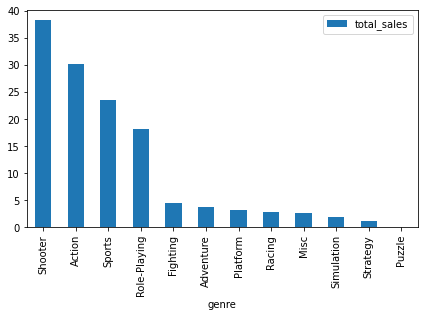

In [48]:
sales_by_genre_2016.plot(kind='bar', figsize=(7,4))

<font color='Blue'><b> Видно, что в 2016 самым популярным жанром был Shooter. С небольшим отставанием но отрывом от остальных  жанров лидировали Action, Sports и RPG
    
Для сравнения, можно посмотреть на самые популярные жанры за всю историю:

In [49]:
# Средние и медианные значения продаж за 2016 год
genre_stats_2016 = top_data.pivot_table(
    index='genre', values='total_sales', aggfunc=['median', 'mean']).reset_index()
genre_stats_2016.columns = ['genre', 'median_sales_2016', 'mean_sales_2016']
genre_stats_2016

,genre,median_sales_2016,mean_sales_2016
0,Action,0.050,0.169157
1,Adventure,0.020,0.068214
2,Fighting,0.085,0.279375
3,Misc,0.040,0.081250
4,Platform,0.100,0.215333
5,Puzzle,0.010,0.010000
6,Racing,0.050,0.116250
7,Role-Playing,0.120,0.336667
8,Shooter,0.240,0.813191
9,Simulation,0.025,0.105000


In [50]:
# Продажи по жанрам за все время
genre_sales = data.pivot_table(
    index=['genre', 'year_of_release'], values='total_sales', aggfunc='sum')
genre_sales


total_sales
genre    year_of_release             
Action   1980                    0.34
         1981                   14.79
         1982                    6.50
         1983                    2.86
         1984                    1.85
...                               ...
Strategy 2012                    3.26
         2013                    6.12
         2014                    0.98
         2015                    1.85
         2016                    1.13

[387 rows x 1 columns]

In [51]:
# Средние и медианные значения продаж за все время
genre_stats = genre_sales.pivot_table(
    index='genre', values = 'total_sales', aggfunc=['median', 'mean']).reset_index()
genre_stats.columns = ['genre', 'all_time_median_sales', 'all_time_mean_sales']
genre_stats



,genre,all_time_median_sales,all_time_mean_sales
0,Action,27.730,46.392432
1,Adventure,6.850,8.333214
2,Fighting,15.230,15.264138
3,Misc,15.550,25.493226
4,Platform,22.420,22.931944
5,Puzzle,4.380,7.055588
6,Racing,18.330,22.609063
7,Role-Playing,29.050,30.034839
8,Shooter,17.195,28.926667
9,Simulation,9.135,12.932000


In [52]:
# Объединим две таблицы со средними и медианными значениями продаж для наглядности
from functools import reduce
genre_pivot = [genre_stats, genre_stats_2016]
genre_stats_merged = reduce(lambda left,right: pd. merge(left,right,on=['genre'],
how='outer'), genre_pivot)
genre_stats_merged.sort_values(by='all_time_median_sales', ascending=False)

,genre,all_time_median_sales,all_time_mean_sales,median_sales_2016,mean_sales_2016
10,Sports,30.040,35.396486,0.120,0.489375
7,Role-Playing,29.050,30.034839,0.120,0.336667
0,Action,27.730,46.392432,0.050,0.169157
4,Platform,22.420,22.931944,0.100,0.215333
6,Racing,18.330,22.609063,0.050,0.116250
8,Shooter,17.195,28.926667,0.240,0.813191
3,Misc,15.550,25.493226,0.040,0.081250
2,Fighting,15.230,15.264138,0.085,0.279375
9,Simulation,9.135,12.932000,0.025,0.105000
1,Adventure,6.850,8.333214,0.020,0.068214


<font color='Blue'><b> Топ-3 жанров по средним/медианным продажам за все время: Sports, RPG, Action

In [53]:
# Самые продаваемые жанры за все время
bestselling_genres = genre_sales.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index()
bestselling_genres

,genre,total_sales
0,Action,1716.52
1,Sports,1309.67
2,Shooter,1041.36
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


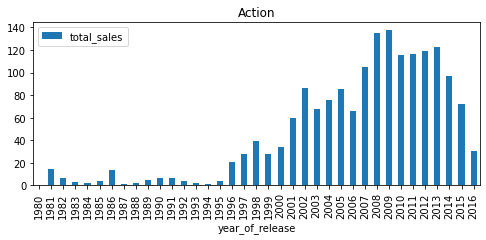

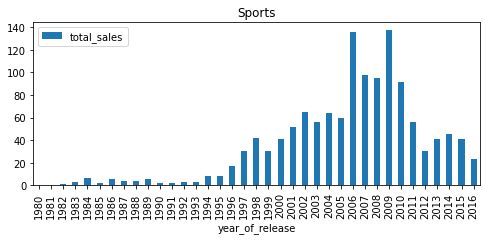

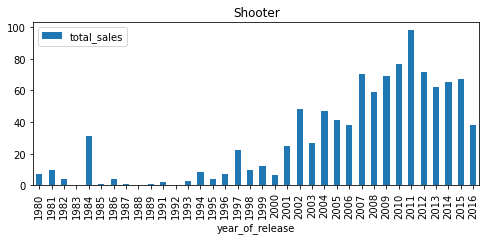

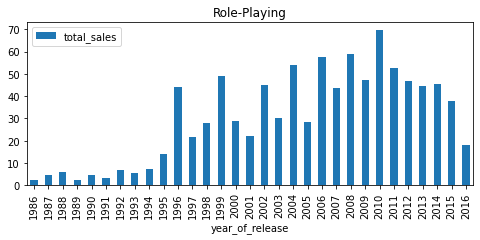

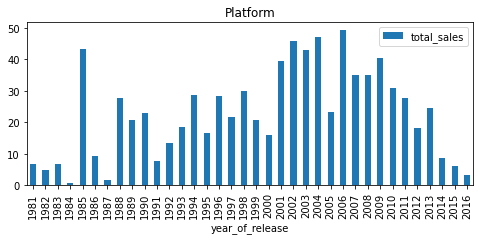

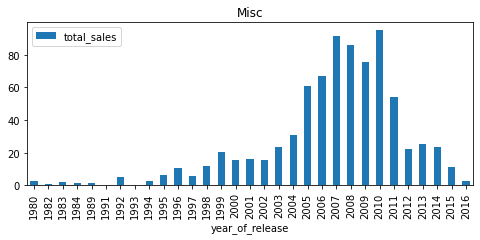

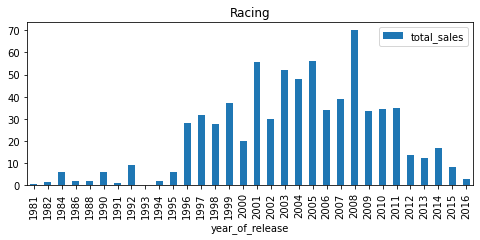

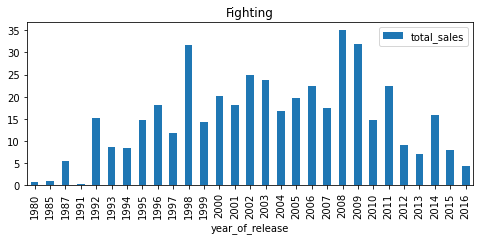

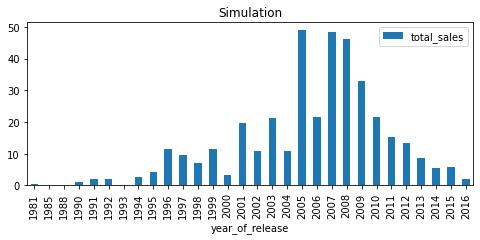

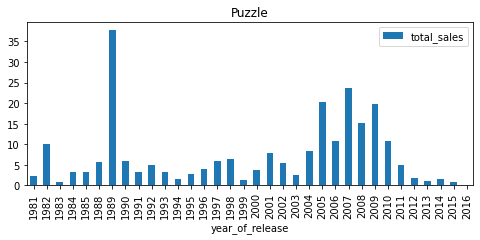

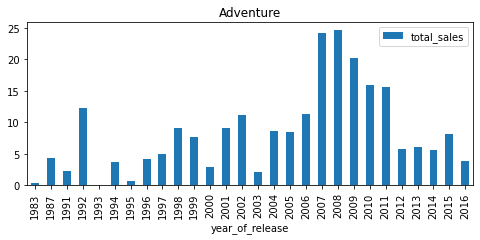

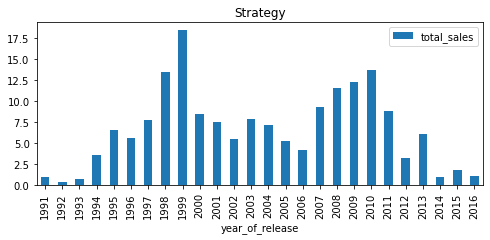

In [54]:
list_of_genres = bestselling_genres['genre']
for genre in list_of_genres:
    data[data['genre']==genre].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(8,3))
    plt.title(genre)

<font color='Blue'><b>  Видно, что несмотря на развитие технологий и производство новых игровых платформ, позволяющих все глубже погружаться в виртуальную реальность при помощи жанров типа Action и Shooter, некоторые игры со временем не теряют своей актуальности (к примеру Стратегии, Файтинги и Платформы вроде братьев Марио). Хотя популярность игр жанра "Platforms" можно объяснить высоким спросом на мобильные консоли

## Составьте портрет пользователя каждого региона
    Определите для пользователя каждого региона (NA, EU, JP):
        ● Самые популярные платформы (топ-5). Опишите различия в долях продаж.
        ● Самые популярные жанры (топ-5). Поясните разницу.
        ● Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
# Анализ региональных пользователей за все время:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


<AxesSubplot:xlabel='platform'>

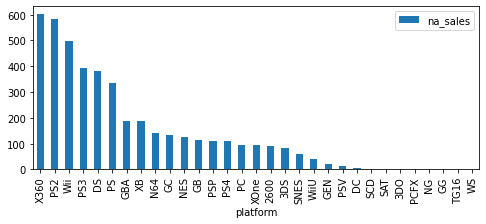

In [56]:
na_platforms = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platforms.plot(kind='bar', figsize=(8,3))

<AxesSubplot:xlabel='platform'>

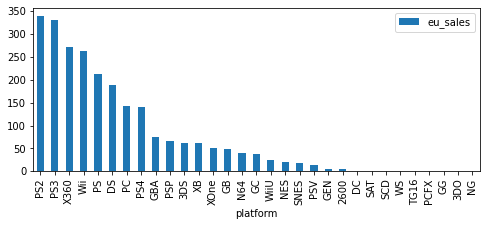

In [57]:
eu_platforms = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platforms.plot(kind='bar', figsize=(8,3))

<AxesSubplot:xlabel='platform'>

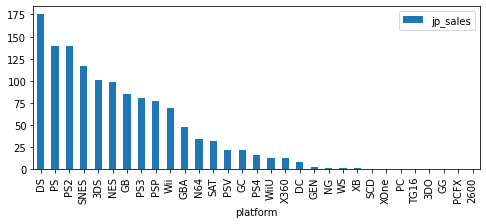

In [58]:
jp_platforms = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platforms.plot(kind='bar', figsize=(8,3))

In [59]:
from functools import reduce
platforms_by_region = [na_platforms, eu_platforms, jp_platforms]
platforms_sales_merged = reduce(lambda left,right: pd. merge(left,right,on=['platform'],
how='outer'), platforms_by_region)
platforms_sales_merged

,na_sales,eu_sales,jp_sales
platform,,,
X360,602.47,270.76,12.43
PS2,583.84,339.29,139.20
Wii,496.90,262.21,69.33
PS3,393.49,330.29,80.19
DS,382.40,188.89,175.57
PS,336.52,213.61,139.82
GBA,187.54,75.25,47.33
XB,186.69,60.95,1.38
N64,139.02,41.06,34.22


([<matplotlib.patches.Wedge at 0x7fabe69524f0>,
 [Text(0.8904280005804261, 0.6458621956596815, 'Action'),
  Text(-0.18922541730736642, 1.0836022062753718, 'Sports'),
  Text(-0.9723766639259795, 0.5142797132419116, 'Shooter'),
  Text(-1.0646076745531488, -0.2767860171369516, 'Platform'),
  Text(-0.7150475370195954, -0.835886965924347, 'Misc'),
  Text(-0.1756265979348109, -1.0858891739481726, 'Racing'),
  Text(0.3589048740649081, -1.039801563459323, 'Role-Playing'),
  Text(0.7319056668084638, -0.8211663016062326, 'Fighting'),
  Text(0.9357722842694715, -0.5782129642208792, 'Simulation'),
  Text(1.038530710788243, -0.36256580471642236, 'Puzzle'),
  Text(1.0835758778417646, -0.18937612563216527, 'Adventure'),
  Text(1.0986830460522534, -0.05381044803142072, 'Strategy')])

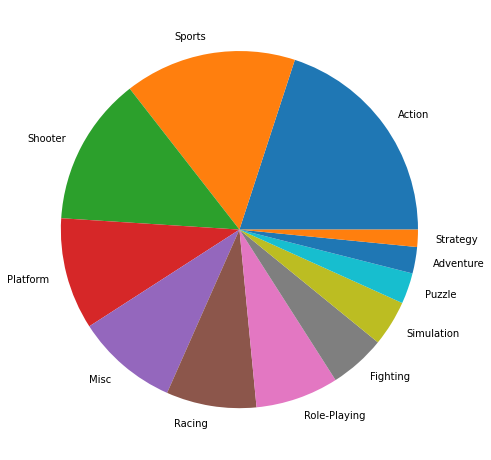

In [60]:
na_genres = data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)
plt.figure(figsize=(8,10))
plt.pie(na_genres['na_sales'], labels=na_genres.index)

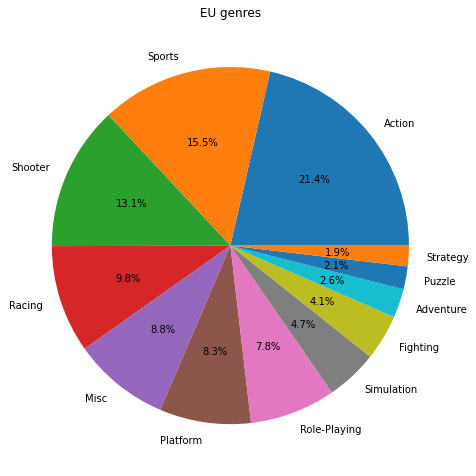

In [61]:
eu_genres= data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)
plt.figure(figsize=(8,10))
plt.pie(eu_genres['eu_sales'],labels=eu_genres.index, autopct='%1.1f%%')
plt.title('EU genres')
plt.show()

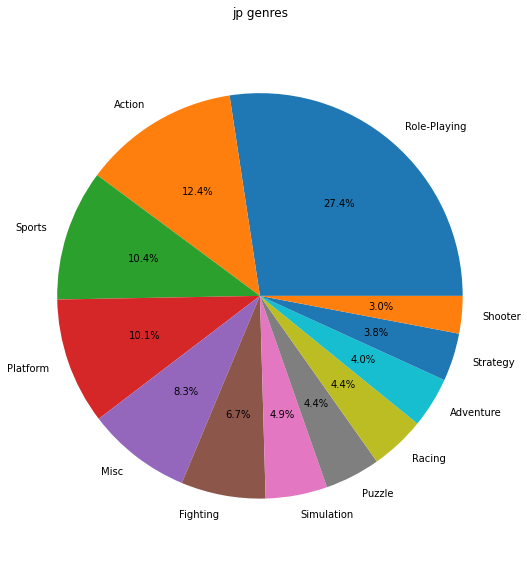

In [62]:
jp_genres = data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)
plt.figure(figsize=(8,10))
plt.pie(jp_genres['jp_sales'],labels=jp_genres.index, autopct='%1.1f%%')
plt.title('jp genres')
plt.axis('equal')
plt.show()

In [63]:
from functools import reduce
genres_by_region = [na_genres, eu_genres, jp_genres]
genre_sales_merged = reduce(lambda left,right: pd. merge(left,right,on=['genre'],
how='outer'), genres_by_region)
genre_sales_merged

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,38.76
Platform,445.50,200.35,130.83
Misc,407.27,212.74,108.11
Racing,359.35,236.51,56.71
Role-Playing,330.81,188.71,355.41
Fighting,223.36,100.33,87.48
Simulation,181.92,113.52,63.80


<font color='Blue'><b> Исправил в начале

In [64]:
na_ratings = data.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)
na_ratings

,na_sales
rating,
E,1295.55
no_rating,1242.46
T,759.75
M,748.48
E10+,353.32
EC,1.53
AO,1.26
RP,0.00


In [65]:
eu_ratings = data.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)
eu_ratings

,eu_sales
rating,
E,710.52
no_rating,613.83
M,483.97
T,427.03
E10+,188.52
AO,0.61
EC,0.11
RP,0.08


In [66]:
jp_ratings = data.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)
jp_ratings

,jp_sales
rating,
no_rating,841.96
E,199.57
T,151.40
M,64.24
E10+,40.20
AO,0.00
EC,0.00
RP,0.00


<font color='Blue'><b> В Японии лидером по продажам являются игры без рейтинга. Возможно, это большое количество местных японских игр, которые не попадают в зону ответственности ESRB, либо совсем новые игры, которые ESRB еще не успела оценить.

In [67]:
from functools import reduce
ratings_by_region = [na_ratings, eu_ratings, jp_ratings]
rating_sales_merged = reduce(lambda left,right: pd. merge(left,right,on=['rating'],
how='outer'), ratings_by_region)
rating_sales_merged

,na_sales,eu_sales,jp_sales
rating,,,
E,1295.55,710.52,199.57
no_rating,1242.46,613.83,841.96
T,759.75,427.03,151.40
M,748.48,483.97,64.24
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00
RP,0.00,0.08,0.00


In [68]:
# Анализ региональных пользователей за 2016 год
top_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,no_rating,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [69]:
na_platforms_2016 = top_data.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_platforms_2016 = top_data.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_platforms_2016 = top_data.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
from functools import reduce
platforms_by_region_2016 = [na_platforms_2016, eu_platforms_2016, jp_platforms_2016]
platforms_2016_merged = reduce(lambda left,right: pd. merge(left,right,on=['platform'],
how='outer'), platforms_by_region_2016)
platforms_2016_merged

,na_sales,eu_sales,jp_sales
platform,,,
PS4,21.49,31.78,5.74
XOne,14.27,9.63,0.01
3DS,4.14,2.33,8.03
WiiU,2.10,1.48,0.67
PC,1.36,3.53,0.00
X360,0.69,0.71,0.00
PS3,0.67,1.26,1.30
PSV,0.15,0.39,3.56
Wii,0.06,0.11,0.00


In [70]:
na_genres_2016 = top_data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_genres_2016 = top_data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_genres_2016 = top_data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
from functools import reduce
genres_by_region_2016 = [na_genres_2016, eu_genres_2016, jp_genres_2016]
genre_2016_merged = reduce(lambda left,right: pd. merge(left,right,on=['genre'],
how='outer'), genres_by_region_2016)
genre_2016_merged

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,16.24,15.90,1.06
Action,9.29,10.68,7.07
Sports,7.54,12.01,0.92
Role-Playing,5.89,4.28,6.61
Fighting,1.84,1.34,0.75
Platform,1.29,1.39,0.11
Adventure,0.95,1.32,1.18
Misc,0.76,0.66,1.04
Racing,0.73,1.77,0.01


In [71]:
na_ratings_2016 = top_data.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_ratings_2016 = top_data.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_ratings_2016 = top_data.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
from functools import reduce
ratings_by_region_2016 = [na_ratings_2016, eu_ratings_2016, jp_ratings_2016]
rating_2016_merged = reduce(lambda left,right: pd. merge(left,right,on=['rating'],
how='outer'), ratings_by_region_2016)
rating_2016_merged

,na_sales,eu_sales,jp_sales
rating,,,
M,15.67,16.54,1.20
T,8.95,9.79,2.27
no_rating,8.53,7.47,14.32
E,7.97,13.61,1.07
E10+,3.81,3.81,0.45


<font color='Blue'><b> 
Анализ помог нарисовать портрет пользователей по регионам в 2016 году:
    
В Северной Америке с большим отрывом лидируют PS4 и Xbox One. Любимые жанры: Shooter, Action, Sports. 
    
В Европе самой популярной игровой консолью является Sony Playstation 4. На нее приходится бОльшая часть общих продаж.
Любимыми жанрами также являются Shooter, Action и Sports.
    
И там, и там большинство продаваемых игр предназначены для аудитории старше 17 лет (рейтинг "М"). Игры с рейтингом "Е" (без возрастных ограничений) практически также популярны в Европе, как и игры "М", но в Северной Америке игры "М" лидируют со значительным отрывом. Игры для тинейджеров "Т" в обоих регионах продаются примерно в одинаковых количествах.
    
В Японии, в отличие от Северной Америки и Европы, любимой консолью геймеров является Nintendo 3DS (появившаяся, к слову, в 2010 году и прекратившая производиться в 2020 - те же 10 лет жизни консоли), однако по продажам ей ненамного уступает PS4.
Игровые предпочтения также отличны: три любимых жанра японцев - Action, RPG, Adventure. 
Чаще всего продаются игры для тинейджеров от 13 лет с рейтингом "Т"
    


## Проверьте гипотезы

    ● Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    ● Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) 
    и Sports (англ. «спортивные соревнования») разные.
    
    Задайте самостоятельно пороговое значение alpha.

In [72]:
# Нулевая гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные
#############################################################################################

xone_user_score = data[data['platform']=='XOne']['user_score']
pc_user_score = data[data['platform']=='PC']['user_score']

alpha = .01

results = st.ttest_ind(
    xone_user_score.dropna(), 
    pc_user_score.dropna(), equal_var=False )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.935072360183574e-06
Отвергаем нулевую гипотезу


<font color='Blue'><b> Для предоставленных данных по 2016 году верно следующее утверждение: 
средние пользовательские рейтинги платформ Xbox One и PC разные.

In [73]:
# Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
# Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные
#############################################################################################

action_user_score = data[data['genre']=='Action']['user_score']
sports_user_score = data[data['genre']=='Sports']['user_score']

alpha = .01

results = st.ttest_ind(
    action_user_score.dropna(), 
    sports_user_score.dropna(), equal_var=False )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


<font color='Blue'><b>Таким образом, гипотеза "средние пользовательские рейтинги жанров Action и Sports одинаковые" не отвергается

## Напишите общий вывод

<font color='Blue'><b>

В предобработке данных были изменены форматы отдельных столбцов, приведены к нижнему регистру названия колонок. Преобразован тип данных необходимых столбцов. Значения "tbd" (to be determined) были заменены на NaN для проведения дальнейшего анализа. 

Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с середины 90х до 2008 года. Пиковым стал период 2008-2009 гг.. За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS. Была определена средняя продолжительность жизни игровой приставки - порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Самые популярные жанры за все время: Action, Sports, Shooter. 
    
Самые популярные игровые платформы в Северной Америке за все время: Xbox, PS2, Wii, PS3, DS. Топ 5 жанров: Аction, Sports, Shooter, Platform, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе: PS2, PS3, XBOX, Wii, PS. Топ 5 жанров в Европе : Action, Sports, Shooter, Racing, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

Самые популярные игровые платформы в Японии: DS, PS, PS2, SNES, 3DS. Топ 5 жанров в Японии : RPG, Action, Sports, Platform, Misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

 Портреты пользователей каждого региона за 2016 год.

В Северной Америке:
- Топ игровых платформ: PS4, Xbox One, Nintendo 3DS;
- Топ Жанров игр: Shooter, Action, Sports;
- Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".

В Европе:
- Топ игровых платформ : PS4, Xbox One, PC;
- Топ жанров: Shooter, Sports, Action;
- Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".

В Японии:
- Топ игровых платформ : Nintendo 3DS, PS4, PSVita;
- Топ жанров: Action, RPG, Adventure;
- Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех". 
    
Анализ показал, что наиболее перспективными для производителей в 2017 году являются игры жанров Shooter и Action для платформ PS4 и Xbox One. Также имеет смысл подумать над производством игр Sports. Основная целевая аудитория - пользователи от 13 лет и старше. 